# 1.  Scikit Learn is simple

This notebook is after the following video - https://www.youtube.com/watch?v=ZL77pbWBZQA&t=2346s

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Training data is of shape',X_train.shape,'Test data is of shape', X_test.shape)
print ('Shape of the Predictor is', y_pred.shape)

Training data is of shape (112, 4) Test data is of shape (38, 4)
Shape of the Predictor is (38,)


Transformations

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print ('Feature Vector X is converted with shape',X.shape,'into a new feature', X_pca.shape)

Feature Vector X is converted with shape (150, 4) into a new feature (150, 2)


In [16]:
import numpy as np
np.set_printoptions(precision=2)

from sklearn.model_selection import cross_val_score, StratifiedKFold
scores = cross_val_score(SVC(), X_train, y_train, cv=5)
print('For the 5 folds that are selected above the cross val scores are', scores)

For the 5 folds that are selected above the cross val scores are [ 1.    0.91  1.    0.91  0.95]


In [19]:
print ('There are also other ways of splitting the data in sklearn, here is an example of shuffle split')
from sklearn.model_selection import ShuffleSplit
cv_ss = ShuffleSplit(len(X_train))
scores_shuffle_split = cross_val_score(SVC(), X_train, y_train, cv=cv_ss)
print('Cross cal scores after the data split of', cv_ss, 'is')
print(scores_shuffle_split)

There are also other ways of splitting the data in sklearn, here is an example of shuffle split
Cross cal scores after the data split of ShuffleSplit(n_splits=112, random_state=None, test_size='default',
       train_size=None) is
[ 1.    1.    1.    1.    1.    1.    1.    0.92  0.92  1.    1.    1.    1.
  1.    0.92  1.    0.92  1.    0.92  0.92  1.    1.    1.    0.92  1.    1.
  0.92  0.92  1.    1.    1.    1.    1.    1.    0.83  0.92  1.    1.    1.
  1.    0.92  1.    1.    1.    0.92  1.    1.    0.92  0.92  0.92  1.    1.
  1.    1.    1.    0.83  1.    0.92  1.    0.92  1.    1.    0.92  1.    1.
  1.    1.    1.    1.    1.    0.92  1.    1.    1.    1.    1.    1.    1.
  0.92  1.    1.    0.92  1.    0.92  0.92  1.    1.    1.    1.    1.
  0.92  0.92  0.92  1.    0.92  0.92  1.    1.    1.    1.    1.    0.92
  1.    0.92  1.    1.    1.    1.    1.    0.92  1.    1.  ]


In [26]:
print ('Leave One out is another method of K fold with Number of split equal the number of samples')
from sklearn.model_selection import LeaveOneOut
labels = np.arange(len(X_train)) % 3
cv_label = LeaveOneLabelOut(labels)
scores_pout = cross_val_score(SVC(), X_train, y_train, cv=cv_label)
print ('Since the data is divided into 3 sets, the result score of the 3 cross val is', scores_pout)

Leave One out is another method of K fold with Number of split equal the number of samples
Since the data is divided into 3 sets, the result score of the 3 cross val is [ 0.92  1.    0.97]


Cross-validated grid-searches

In [29]:
print ('GRID SEARCH is the most extensively used method to tune Hyper parameters. It is also called the Meta estimators')
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma': 10. ** np.arange(-3, 3)}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print('The best parameters available in the grid is', grid.best_params_)
print('The best estimator score is', grid.score(X_test, y_test))

GRID SEARCH is the most extensively used method to tune Hyper parameters. It is also called the Meta estimators
The best parameters available in the grid is {'C': 1.0, 'gamma': 1.0}
The best estimator score is 0.947368421053


Pipelining

In [31]:
print ('Pipeline are also called MetaEstimators')
print ('Similar to stacking lego blocks we can stack various components in Pipeline')
print ('All layers except the last bottom most block should be a transformer')
print ('The bottom most block should be any estimator')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.predict(X_test)

Pipeline are also called MetaEstimators
Similar to stacking lego blocks we can stack various components in Pipeline
All layers except the last bottom most block should be a transformer
The bottom most block should be any estimator


array([1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2])

# 2 - Combining Pipelines and GridSearchCV

In [32]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
# wrong way to do GridSearch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_preprocessed = scaler.fit_transform(X_train)
param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma': 10. ** np.arange(-3, 3)}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
print(grid)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


In [38]:
# The correct way to do GridSearchCV

from sklearn.pipeline import make_pipeline

param_grid_pipeline = {'svc__C': 10. ** np.arange(-3, 3), 'svc__gamma': 10. ** np.arange(-3, 3)}

scaler_pipe = make_pipeline(StandardScaler(), SVC())
grid = GridSearchCV(scaler_pipe, param_grid=param_grid_pipeline, cv=5)

grid.fit(X_train, y_train)
print(grid)
print(' ')
print(grid.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'svc__gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
 
{'svc__C': 1.0, 'svc__gamma': 0.10000000000000001}


In [39]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

param_grid = {'selectkbest__k': [1, 2, 3, 4], 'svc__C': 10. ** np.arange(-3, 3), 'svc__gamma': 10. ** np.arange(-3, 3)}

scaler_pipe = make_pipeline(SelectKBest(), SVC())
grid = GridSearchCV(scaler_pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'selectkbest__k': 2, 'svc__C': 1.0, 'svc__gamma': 1.0}


In [43]:
text_pipe = make_pipeline(TfidfVectorizer(), LinearSVC())
param_grid = {'tfidifvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)], 'linearsvc__C': 10. ** np.arange(-3, 3)}

grid = GridSearchCV(text_pipe, param_grid=param_grid, cv=5)

# 3 -More process building tools!

In [44]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [45]:
news = fetch_20newsgroups()
data, y = news.data, news.target
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data, y)

In [46]:
char_and_word = make_union(TfidfVectorizer(analyzer="char"), TfidfVectorizer(analyzer="word"))

text_pipe = make_pipeline(char_and_word, LinearSVC(dual=False))
param_grid = {'linearsvc__C': 10. ** np.arange(-3, 3)}

grid = GridSearchCV(text_pipe, param_grid=param_grid, cv=5, verbose=10)

In [47]:
grid.fit(data_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] linearsvc__C=0.001 ..............................................
[CV] ..................... linearsvc__C=0.001, score=0.605865 -  11.0s
[CV] linearsvc__C=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV] ..................... linearsvc__C=0.001, score=0.628975 -  10.7s
[CV] linearsvc__C=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.7s remaining:    0.0s


[CV] ..................... linearsvc__C=0.001, score=0.629127 -  10.6s
[CV] linearsvc__C=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.3s remaining:    0.0s


[CV] ..................... linearsvc__C=0.001, score=0.625000 -  11.5s
[CV] linearsvc__C=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   43.8s remaining:    0.0s


[CV] ..................... linearsvc__C=0.001, score=0.613609 -  10.7s
[CV] linearsvc__C=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.5s remaining:    0.0s


[CV] ...................... linearsvc__C=0.01, score=0.782405 -  15.2s
[CV] linearsvc__C=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV] ...................... linearsvc__C=0.01, score=0.796820 -  12.5s
[CV] linearsvc__C=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV] ...................... linearsvc__C=0.01, score=0.801887 -  13.4s
[CV] linearsvc__C=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV] ...................... linearsvc__C=0.01, score=0.807783 -  13.2s
[CV] linearsvc__C=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV] ...................... linearsvc__C=0.01, score=0.786391 -  13.0s
[CV] linearsvc__C=0.1 ................................................
[CV] ....................... linearsvc__C=0.1, score=0.882111 -  17.7s
[CV] linearsvc__C=0.1 ................................................
[CV] ....................... linearsvc__C=0.1, score=0.882214 -  17.3s
[CV] linearsvc__C=0.1 ................................................
[CV] ....................... linearsvc__C=0.1, score=0.888561 -  16.5s
[CV] linearsvc__C=0.1 ................................................
[CV] ....................... linearsvc__C=0.1, score=0.905071 -  17.4s
[CV] linearsvc__C=0.1 ................................................
[CV] ....................... linearsvc__C=0.1, score=0.881065 -  16.7s
[CV] linearsvc__C=1.0 ................................................
[CV] ....................... linearsvc__C=1.0, score=0.906745 -  18.1s
[CV] linearsvc__C=1.0 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('tfidfvectorizer-1', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'linearsvc__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [48]:
print(grid.best_params_)

{'linearsvc__C': 1.0}


In [49]:
# Another sample Parameter grid

"""param_grid = {'featureunion__tfidfvectorizer-1__ngram_range': [(1, 3), (1, 5), (2, 5)],
              'featureunion__tfidfvectorizer-2__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'linearsvc__C': 10. ** np.arange(-3, 3)}
"""

"param_grid = {'featureunion__tfidfvectorizer-1__ngram_range': [(1, 3), (1, 5), (2, 5)],\n              'featureunion__tfidfvectorizer-2__ngram_range': [(1, 1), (1, 2), (2, 2)],\n              'linearsvc__C': 10. ** np.arange(-3, 3)}\n"

# 4 - Randomized Searching

Advantages:
1. Step Size free for continous Parameters
2. Decouples runtime from search space size
3. Robust against irrelevant parameters

It should be:

1. For continous varaibles there should be a distribution that should be used
2. Should not be used for low dimensional spaces
3. Future - Bayesian Optimization Based search

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split


iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

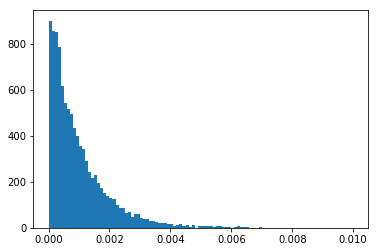

In [52]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import expon
plt.hist([expon.rvs(scale=0.001) for x in range(10000)], bins=100, normed=True);

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

param_distributions = {'C': expon(), 'gamma': expon()}
rs = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=50)

In [54]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e841748>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11e853da0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [55]:
rs.best_params_

{'C': 2.4481449650687299, 'gamma': 0.14823675343781187}

In [56]:
rs.best_score_

0.9732142857142857

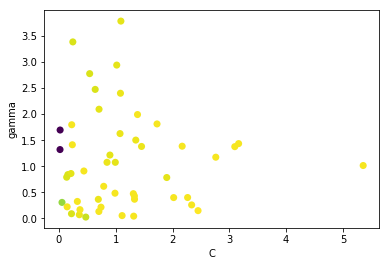

In [57]:
scores, Cs, gammas = zip(*[(score.mean_validation_score, score.parameters['C'], score.parameters['gamma']) 
                           for score in rs.grid_scores_])

plt.scatter(Cs, gammas, s=50, c=scores, linewidths=0)
plt.xlabel("C")
plt.ylabel("gamma")
plt.show()

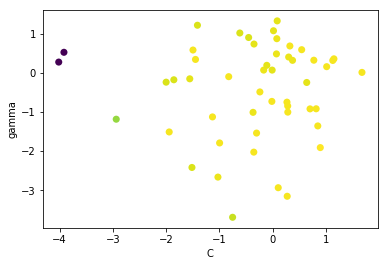

In [58]:
plt.scatter(np.log(Cs), np.log(gammas), s=50, c=scores, linewidths=0)
plt.xlabel("C")
plt.ylabel("gamma")
plt.show()

# 5 - Advanced Scoring

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
np.set_printoptions(precision=2)

digits = load_digits()
X, y = digits.data, digits.target == 3
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma': 10. ** np.arange(-3, 3)}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'C': 10.0, 'gamma': 0.001}
0.993333333333


In [82]:
from sklearn.cross_validation import cross_val_score
cross_val_score(SVC(), X_train, y_train)

array([ 0.9,  0.9,  0.9])

In [83]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier("most_frequent"), X_train, y_train)

array([ 0.9,  0.9,  0.9])

In [85]:
cross_val_score(SVC(), X_train, y_train, scoring = "roc_auc")

array([ 1.,  1.,  1.])

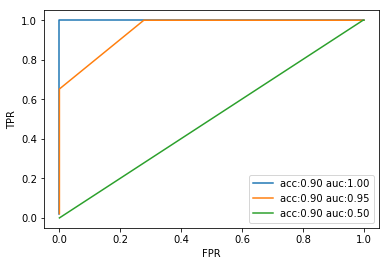

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

for gamma in [.01, .1, 1]:
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc))
    print()
plt.legend(loc="best")

In [86]:
from sklearn.metrics.scorer import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [87]:
from sklearn.metrics.scorer import accuracy_scorer

def my_super_scoring(est, X, y):
    return accuracy_scorer(est, X, y) - np.mean(est.coef_ != 0)

In [88]:
from sklearn.svm import LinearSVC
y = digits.target
grid = GridSearchCV(LinearSVC(C=.01, dual=False), param_grid={'penalty' : ['l1', 'l2']}, scoring=my_super_scoring)
grid.fit(X, y)
print(grid.best_params_)

{'penalty': 'l1'}


In [89]:
from sklearn.metrics.scorer import make_scorer

def scoring_function(y_true, y_pred):
	return (np.abs(y_true - y_pred) < 3).mean()
    
tolerant_scoring = make_scorer(scoring_function)
print(cross_val_score(LinearSVC(random_state=0), X, y))
print(cross_val_score(LinearSVC(random_state=0), X, y, scoring=tolerant_scoring))

[ 0.89  0.95  0.89]
[ 0.94  0.96  0.92]


# 6 - Model Selection - Overfitting and Generalization

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cross_validation import  train_test_split


iris = load_iris()
X = iris.data
y = iris.target


# dataset for decision function visualization
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d)

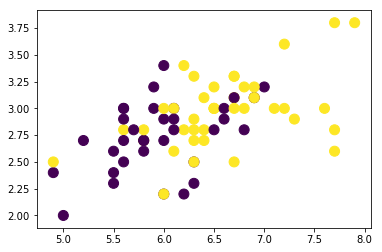

In [69]:
%matplotlib inline
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)

In [70]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4.5, 8, 200), np.linspace(1.5, 4.0, 200))
    try:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    except AttributeError:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(1.5, 4.0)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)

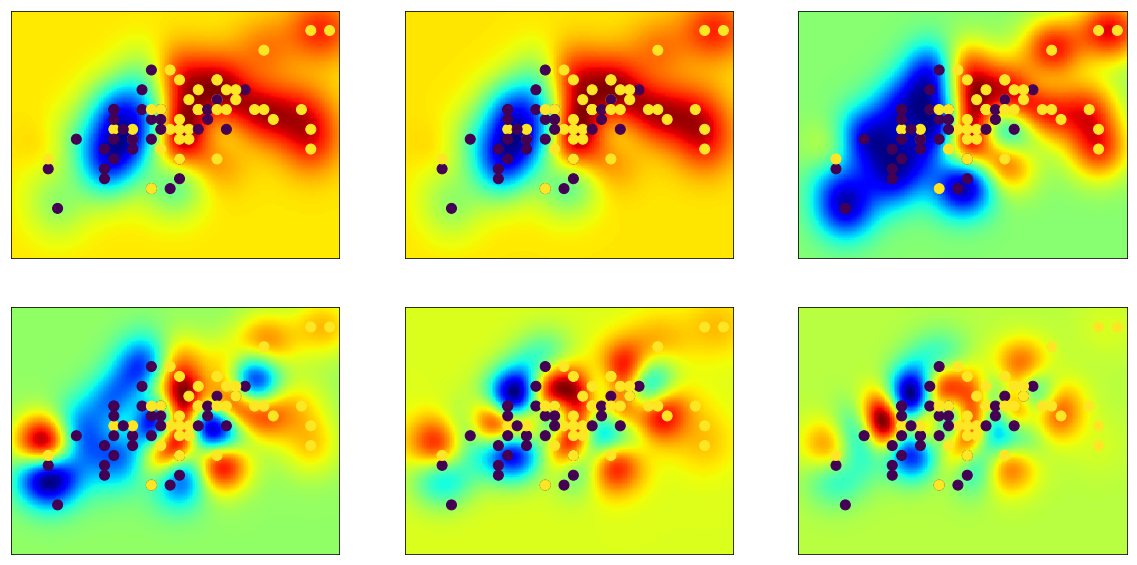

In [71]:
from sklearn.svm import SVC

training_scores = []
test_scores = []
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
Cs = [0.01, 0.1, 1, 10, 100, 1000]

for C, ax in zip(Cs, axes.ravel()):
    clf = SVC(gamma=10, C=C)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    show_decision_function(clf, ax)

plt.savefig("iris_overfitting_decision.png", bbox_inches="tight")

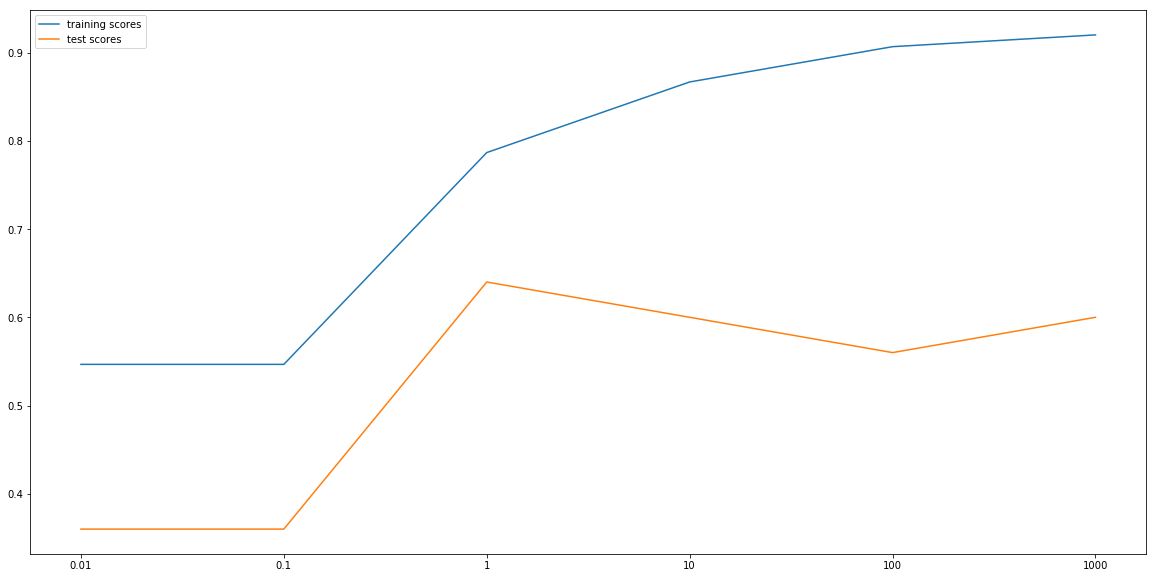

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.legend(loc="best")
plt.xticks(range(6), Cs)
plt.savefig("iris_overfitting_curve.png", bbox_inches="tight")


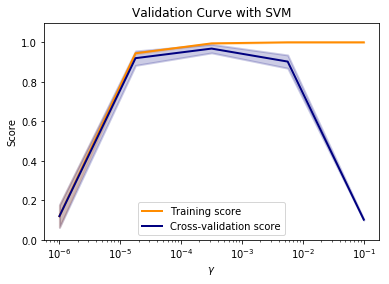

In [78]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

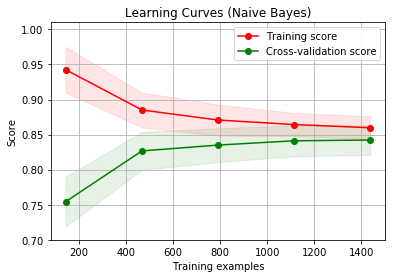

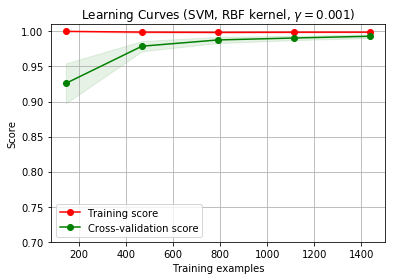

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

# 7 - Out Of Core Learning

In [ ]:
# write out some toy data
from sklearn.datasets import load_digits
import cPickle

digits = load_digits()

X, y = digits.data, digits.target

for i in range(10):
    cPickle.dump((X[i::10], y[i::10]), open("data/batch_%02d.pickle" % i, "w"), -1)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier()

for i in range(9):
    X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
    sgd.partial_fit(X_batch, y_batch, classes=range(10))

In [ ]:
X_test, y_test = cPickle.load(open("data/batch_09.pickle"))

sgd.score(X_test, y_test)

In [ ]:
# Text
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer

sgd = SGDClassifier()
hashing_vectorizer = HashingVectorizer()

for i in range(10):
    data_batch = pd.read_csv("data/train_%d.csv" % i)
    text_batch = data_batch.Comment.tolist()
    y_batch = data_batch.Insult.values
    X_batch = hashing_vectorizer.transform(text_batch)
    sgd.partial_fit(X_batch, y_batch, classes=range(10))

In [ ]:
data_test = pd.read_csv("data/test_with_solutions.csv")
X_test = hashing_vectorizer.transform(data_test.Comment.tolist())
y_test = data_test.Insult.values
sgd.score(X_test, y_test)

In [ ]:
from sklearn.kernel_approximation import RBFSampler

sgd = SGDClassifier()
kernel_approximation = RBFSampler(gamma=.001, n_components=400)

for i in range(9):
    X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
    if i == 0:
        kernel_approximation.fit(X_batch)
    X_transformed = kernel_approximation.transform(X_batch)
    sgd.partial_fit(X_transformed, y_batch, classes=range(10))

In [ ]:
X_test, y_test = cPickle.load(open("data/batch_09.pickle"))
sgd.score(kernel_approximation.transform(X_test), y_test)